In [1]:
### basic package for data science project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

#### Thoughts: 
    - Since data dictionary is not provided, it is hard to tell the meaning of numerical features
    - I think it is best to first seperate the categorical fts and numerical fts and hanle them separately. 
    
#### For numerical features: 
    - Exclude columns with more than 75% of the values missing
    - Impute missing values with mean/median/mode
#### For categorical features: 
    - Focus on understand the features 
    - Creat dummy variable to represent the feature in an appropriate format for training data 
    - remove x39 since all variables have the same value
    - remove x99 since 32% are missing values and the rest has the same value

### Helper function 

In [9]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy co lumns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1),\
                            pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

def clean_day_x3_col(date):
    if date.lower() == 'tue':
        return 'Tuesday'
    elif date.lower() == 'mon':
        return 'Monday'
    elif date.lower() == 'wed':
        return 'Wednesday'
    elif date.lower() == 'thur':
        return 'Thursday'
    elif date.lower() == 'fri':
        return 'Friday'
    elif date.lower() == 'sat':
        return 'Saturday'
    elif date.lower() == 'sun':
        return 'Sunday'
    else:
        return date

### Data summary 

In [10]:
df = pd.read_csv("data/exercise_40_train.csv")
df.describe()

,y,x1,x2,x4,x5,x6,x8,x9,x10,x11,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x100
count,40000.000000,40000.000000,40000.000000,40000.000000,37572.000000,40000.000000,40000.000000,40000.000000,40000.000000,34890.000000,...,29309.000000,40000.000000,34741.000000,37565.000000,37660.000000,27396.000000,33362.000000,40000.000000,40000.000000,40000.000000
mean,0.145075,2.999958,20.004865,0.002950,0.005396,0.007234,0.004371,2.722334,0.490339,100.008988,...,10.767838,3.000166,0.001636,4.002896,3.969385,0.031886,10.525530,10.002814,0.497650,100.024743
std,0.352181,1.994490,1.604291,1.462185,1.297952,1.358551,1.447223,1.966828,1.029863,13.343010,...,3.732763,1.164411,1.468790,3.017420,1.473939,1.823091,1.437581,1.986984,0.500001,5.247514
min,0.000000,-3.648431,13.714945,-5.137161,-5.616412,-6.113153,-6.376810,-3.143438,-3.538129,50.526543,...,6.106024,-2.173310,-6.328126,-3.384399,-1.663063,-6.885150,8.210456,1.911272,0.000000,78.340735
25%,0.000000,1.592714,18.921388,-1.026798,-0.872354,-0.909831,-0.971167,1.340450,-0.207833,91.056682,...,7.927605,2.211125,-0.982679,1.610899,2.943758,-1.190682,9.397548,8.665103,0.000000,96.516856
50%,0.000000,2.875892,20.005944,0.002263,0.008822,0.007335,0.002226,2.498876,0.486926,100.020965,...,9.931831,2.998776,0.005664,4.099763,3.912526,0.001523,10.358355,9.994318,0.000000,100.024977
75%,0.000000,4.270295,21.083465,1.043354,0.892467,0.926222,0.985023,3.827712,1.182994,109.025025,...,12.710543,3.786751,0.989632,6.113157,4.930563,1.248742,11.448559,11.342574,1.000000,103.558762
max,1.000000,13.837591,27.086468,5.150153,5.698128,5.639372,5.869889,18.006669,4.724186,148.784484,...,38.566041,7.130058,6.868747,16.734658,11.669024,7.631773,18.725468,17.861580,1.000000,122.406809


In [11]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


None

In [12]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


### Missing value 

In [13]:
no_nulls = set(df.columns[df.isnull().mean()==0])
len(no_nulls)

59

In [14]:
null_cols = set(df.columns[df.isnull().mean()!=0])
len(null_cols)

42

In [15]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.4])
len(most_missing_cols)

5

In [16]:
df.columns[df.isnull().mean() > 0.4]

Index(['x30', 'x44', 'x52', 'x55', 'x57'], dtype='object')

### Numerical features

In [17]:
non_null_df = df.loc[:, (~df.columns.isin(most_missing_cols))]
non_null_df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


<AxesSubplot:>

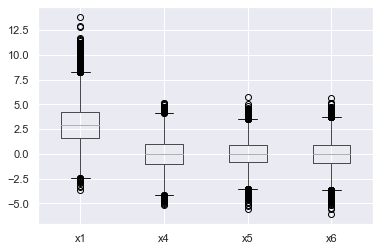

In [21]:
non_null_df.boxplot(column=['x1', 'x4', 'x5', 'x6'])

<AxesSubplot:>

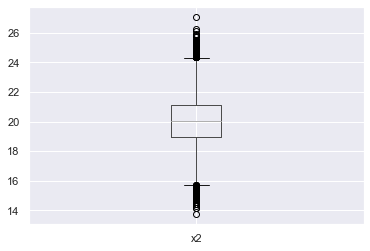

In [23]:
non_null_df.boxplot(column=['x2'])

<AxesSubplot:>

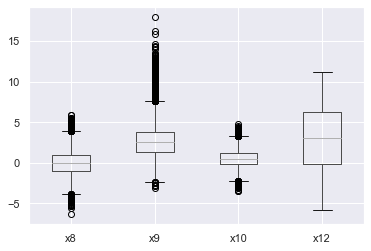

In [20]:
non_null_df.boxplot(column=['x8', 'x9', 'x10', 'x12'])

### Categorial features EDA 

In [12]:
#### find catergorical features
cat_cols = df.select_dtypes(include=['object']).columns
cat_df = df.select_dtypes(include=['object'])
cat_df['y'] = df['y']

#### clean col x7 and x19
cat_df['x7'] = cat_df['x7'].str.replace('%','')
cat_df["x19"] = cat_df['x19'].str.replace('$','')
cat_df = cat_df.astype({'x7': 'float', 'x19': 'float'})

#### clean x3 col
cat_df['x3'] = cat_df.apply(lambda x: clean_day_x3_col(x['x3']), axis = 1)

cat_df.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99,y
0,Wednesday,0.0062,-908.650758,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes,0
1,Friday,0.0064,-1864.962288,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes,1
2,Thursday,-0.0008,-543.187403,male,no,Texas,5-10 miles,September,geico,subaru,no,yes,1
3,Tuesday,-0.0057,-182.626381,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes,0
4,Sunday,0.0109,967.007091,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes,0


In [13]:
len(cat_cols)

12

In [14]:
### cat columns with missing values
set(cat_df.columns[cat_df.isnull().mean() != 0])

{'x24', 'x33', 'x77', 'x99'}

In [15]:
cat_df.isnull().mean()

x3     0.000000
x7     0.000000
x19    0.000000
x24    0.096400
x31    0.000000
x33    0.179275
x39    0.000000
x60    0.000000
x65    0.000000
x77    0.231425
x93    0.000000
x99    0.320900
y      0.000000
dtype: float64

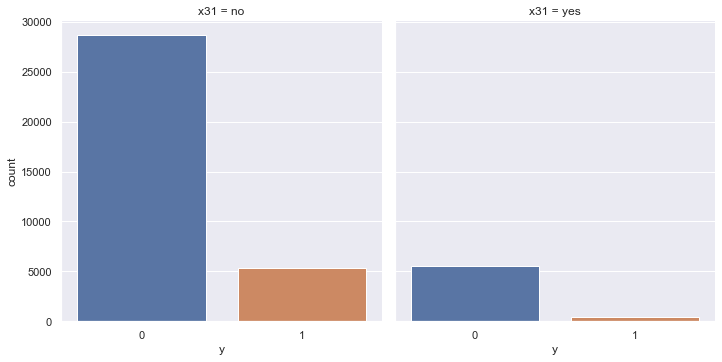

In [16]:
sns.factorplot(x='y', col='x31', kind='count', data=cat_df);

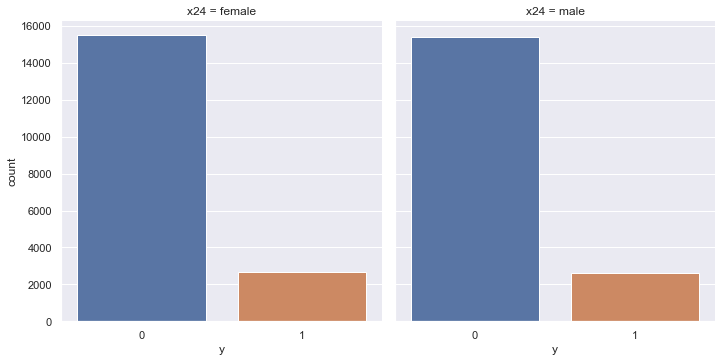

In [17]:
sns.factorplot(x='y', col='x24', kind='count', data=cat_df);

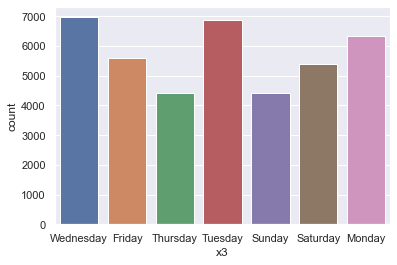

In [18]:
sns.countplot(x='x3', data=cat_df);

[Text(0, 0, 'Colorado'),
 Text(1, 0, 'Tennessee'),
 Text(2, 0, 'Texas'),
 Text(3, 0, 'Minnesota'),
 Text(4, 0, 'New York'),
 Text(5, 0, 'Florida'),
 Text(6, 0, 'Nebraska'),
 Text(7, 0, 'California'),
 Text(8, 0, 'North Dakota'),
 Text(9, 0, 'Arizona'),
 Text(10, 0, 'Alabama'),
 Text(11, 0, 'Ohio'),
 Text(12, 0, 'Pennsylvania'),
 Text(13, 0, 'Iowa'),
 Text(14, 0, 'Indiana'),
 Text(15, 0, 'Vermont'),
 Text(16, 0, 'Arkansas'),
 Text(17, 0, 'Massachusetts'),
 Text(18, 0, 'Illinois'),
 Text(19, 0, 'Georgia'),
 Text(20, 0, 'West Virginia'),
 Text(21, 0, 'Connecticut'),
 Text(22, 0, 'Virginia'),
 Text(23, 0, 'North Carolina'),
 Text(24, 0, 'Montana'),
 Text(25, 0, 'New Mexico'),
 Text(26, 0, 'New Hampshire'),
 Text(27, 0, 'Michigan'),
 Text(28, 0, 'DC'),
 Text(29, 0, 'Washington'),
 Text(30, 0, 'Louisiana'),
 Text(31, 0, 'Kentucky'),
 Text(32, 0, 'Utah'),
 Text(33, 0, 'Missouri'),
 Text(34, 0, 'Oregon'),
 Text(35, 0, 'Oklahoma'),
 Text(36, 0, 'Nevada'),
 Text(37, 0, 'Wisconsin'),
 Text(38, 0,

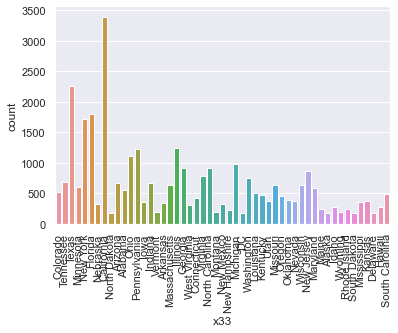

In [137]:
chart = sns.countplot(x='x33', data=cat_df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'August'),
 Text(1, 0, 'April'),
 Text(2, 0, 'September'),
 Text(3, 0, 'January'),
 Text(4, 0, 'December'),
 Text(5, 0, 'March'),
 Text(6, 0, 'July'),
 Text(7, 0, 'November'),
 Text(8, 0, 'June'),
 Text(9, 0, 'February'),
 Text(10, 0, 'October'),
 Text(11, 0, 'May')]

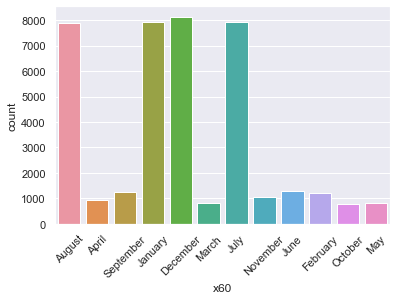

In [126]:
chart = sns.countplot(x='x60', data=cat_df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

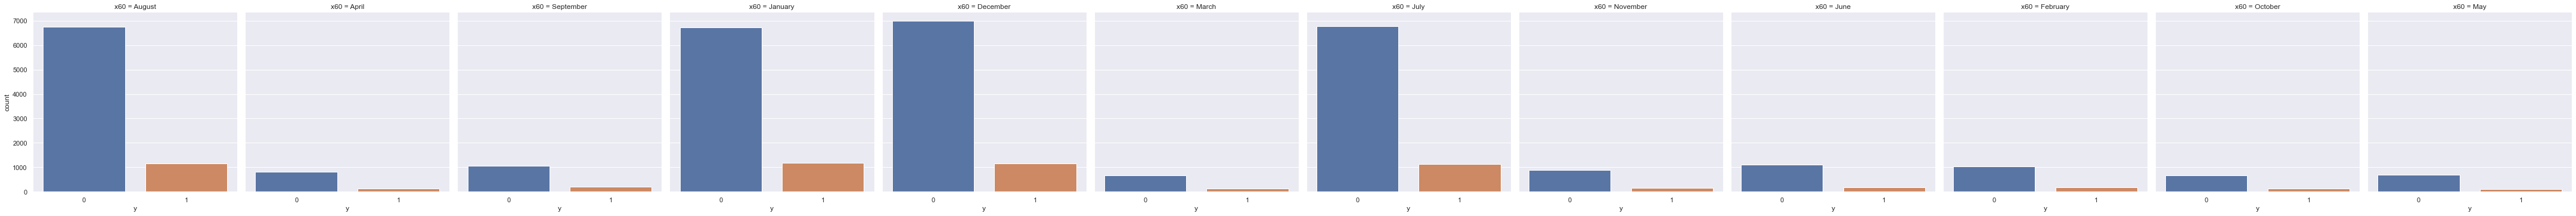

In [127]:
sns.factorplot(x='y', col='x60', kind='count', data=cat_df);

[Text(0, 0, 'farmers'),
 Text(1, 0, 'allstate'),
 Text(2, 0, 'geico'),
 Text(3, 0, 'progressive'),
 Text(4, 0, 'esurance')]

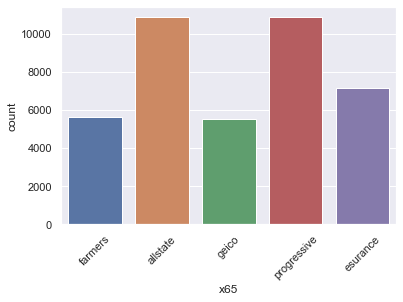

In [129]:
chart = sns.countplot(x='x65', data=cat_df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

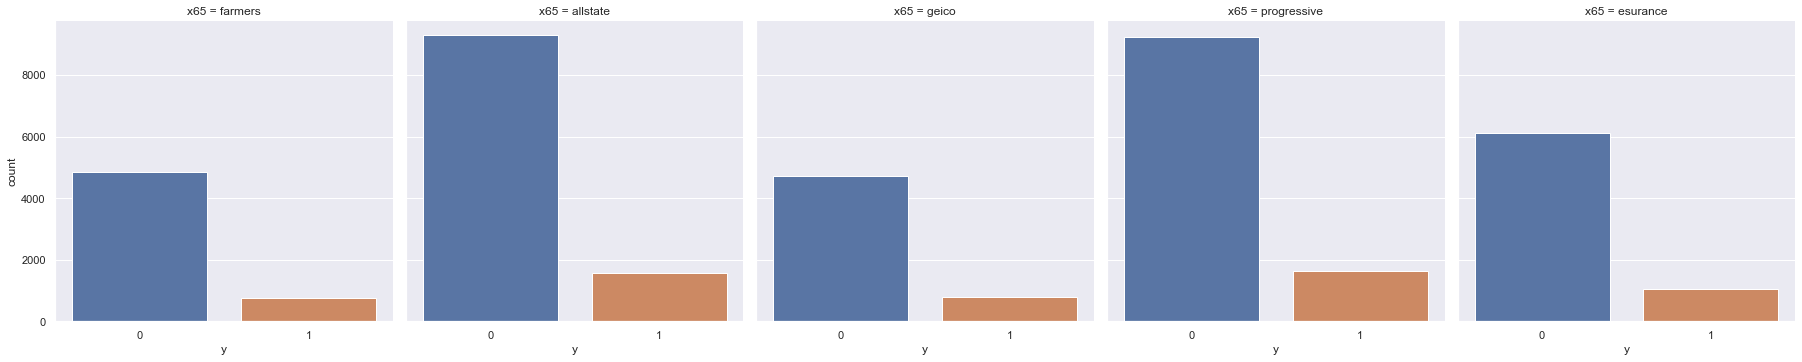

In [128]:
sns.factorplot(x='y', col='x65', kind='count', data=cat_df);

[Text(0, 0, 'mercedes'),
 Text(1, 0, 'subaru'),
 Text(2, 0, 'nissan'),
 Text(3, 0, 'toyota'),
 Text(4, 0, 'chevrolet'),
 Text(5, 0, 'buick'),
 Text(6, 0, 'ford')]

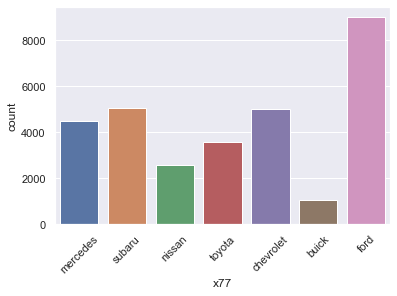

In [130]:
chart = sns.countplot(x='x77', data=cat_df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

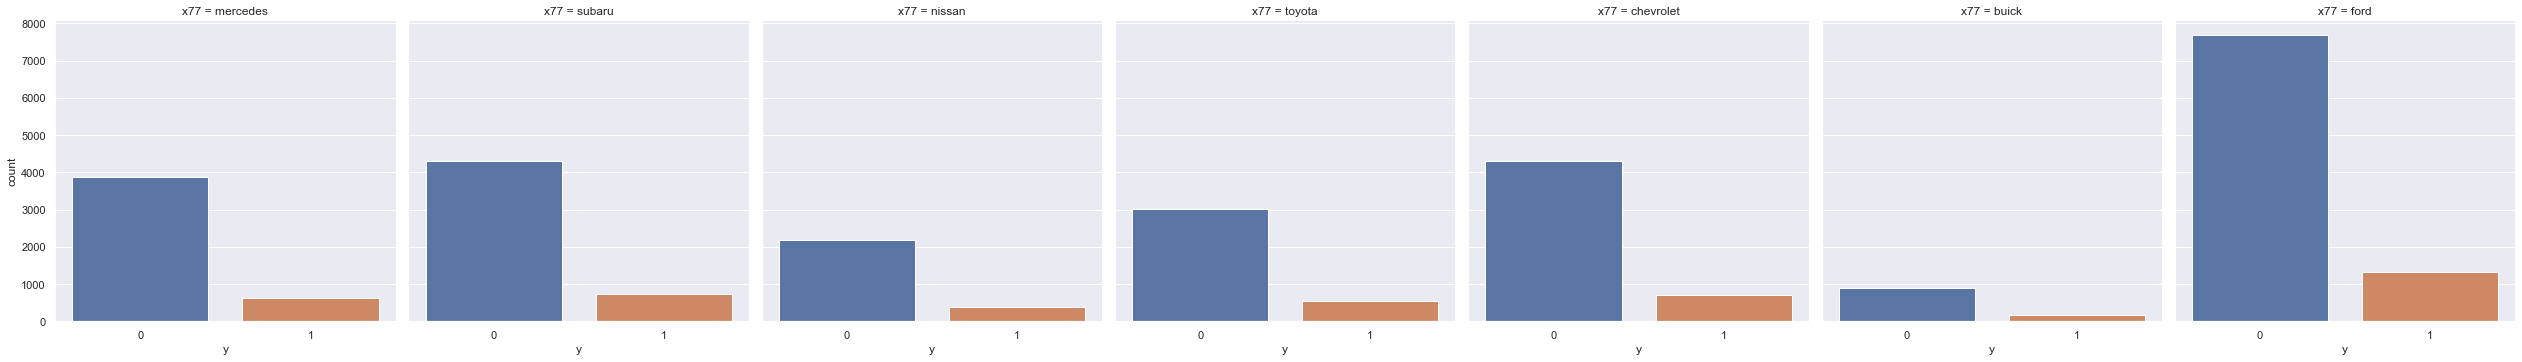

In [131]:
sns.factorplot(x='y', col='x77', kind='count', data=cat_df);

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

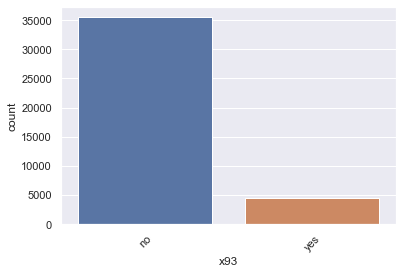

In [132]:
chart = sns.countplot(x='x93', data=cat_df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'yes')]

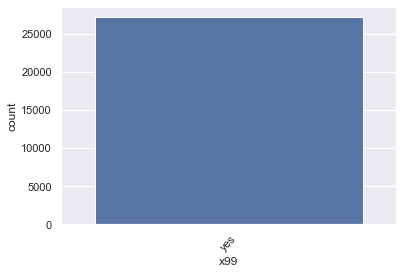

In [133]:
chart = sns.countplot(x='x99', data=cat_df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [123]:
cat_df['x39'].value_counts()

5-10 miles    40000
Name: x39, dtype: int64

In [124]:
cat_df['x60'].value_counts()

December     8136
January      7922
July         7912
August       7907
June         1272
September    1245
February     1213
November     1043
April         951
March         807
May           799
October       793
Name: x60, dtype: int64

In [175]:
clean_df = create_dummy_df(df, cat_cols, dummy_na=True)
clean_df

,y,x1,x2,x4,x5,x6,x8,x9,x10,x11,...,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x77_nan,x93_yes,x93_nan,x99_nan
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.220784,1.816481,1.171788,109.626841,...,0,0,1,0,0,0,0,0,0,0
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,1.192441,3.513950,1.419900,84.079367,...,0,0,1,0,0,0,0,0,0,0
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,0.952323,0.782974,-1.247022,95.375221,...,0,0,0,0,1,0,0,0,0,0
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.520756,1.825586,2.223038,96.420382,...,0,0,0,1,0,0,0,0,0,0
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,-0.732739,2.151990,-0.275406,90.769952,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1.593480,19.628352,0.794697,-0.825849,0.608774,2.183834,3.202119,-0.723356,94.820410,...,0,0,0,0,0,0,1,0,0,0
39996,0,1.708685,17.132638,-2.676659,1.153851,0.465905,-0.048613,3.989567,1.468074,115.785563,...,0,1,0,0,0,0,0,0,0,0
39997,0,1.704132,17.824399,-0.581360,NaN,0.467339,0.904643,2.975563,0.228908,107.939412,...,0,1,0,0,0,0,0,0,0,0
39998,0,3.963408,20.285597,0.430116,0.050189,1.821565,-0.401259,-0.247649,-0.499294,93.314126,...,0,0,0,0,0,0,1,0,0,0
